# Workplace Setup

In [406]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Day0 = pd.read_csv('data/0.csv')
Day1 = pd.read_csv('data/1.csv')
Day2 = pd.read_csv('data/2.csv')

# Q1

In [407]:
print("三日最高价：" + str(max([Day0['last'].max(), Day1['last'].max(), Day2['last'].max()])))
print("三日最低价：" + str(min([Day0['last'].min(), Day1['last'].min(), Day2['last'].min()])))
print("三日累计涨幅： " + str(Day2['last'].iloc[-1] / Day0['preclose'].iloc[0] - 1))
print("三日累计成交额： " + str(sum([Day0['tradecount'].iloc[-1],Day1['tradecount'].iloc[-1],Day2['tradecount'].iloc[-1]])))
Amplitude_0 = (Day0['high'].max() - Day0['low'].min())/Day0['preclose'].iloc[0]
Amplitude_1 = (Day1['high'].max() - Day1['low'].min())/Day1['preclose'].iloc[0]
Amplitude_2 = (Day2['high'].max() - Day2['low'].min())/Day2['preclose'].iloc[0]
print("三日平均震幅：" + str(np.mean([Amplitude_0,Amplitude_1,Amplitude_2])))
ab_change_count = []
for day_data in [Day0,Day1,Day2]:
    ask_change = day_data['ap1'] == day_data['ap1'].shift(1)
    bid_change = day_data['bp1'] == day_data['bp1'].shift(1)
    ab_change = ask_change | bid_change
    ab_change_count.append(ab_change.sum())
print("三日平均盘口变化次数： " + str(np.mean(ab_change_count)))

三日最高价：26.96
三日最低价：23.89
三日累计涨幅： 0.11488469601677131
三日累计成交额： 153913.0
三日平均震幅：0.0635386029902361
三日平均盘口变化次数： 3035.0


# Q3: Data Cleaning

我认为第二问也应当在数据清洗之后分析（比如中间遗失了一些数据点导致在一段时间内产生的交易被认定为在两个tick内发生）

In [408]:
# Sanity Check: every time stamp ends at seconds from {0,3,6,9,....57}
print(len(Day0)-((Day0['timestamp'] % 100000)%3000 == 0).sum())
print(len(Day1)-((Day1['timestamp'] % 100000)%3000 == 0).sum())
print(len(Day2)-((Day2['timestamp'] % 100000)%3000 == 0).sum())

0
0
0


In [409]:
def get_time(timestamp):
    timestamp = timestamp/1000
    s = int(timestamp % 100)
    timestamp = (timestamp - s)/100
    m = int(timestamp % 100)
    timestamp = (timestamp - m)/100
    h = int(timestamp % 100)
    s = str(s).zfill(2)
    m = str(m).zfill(2)
    h = str(h).zfill(2)
    return pd.Timestamp("{}:{}:{}".format(h,m,s))

In [410]:
Day0['timedelta'] = Day0['timestamp'].apply(get_time).diff()
mask = Day0['timedelta']!= pd.Timedelta("3 seconds")
Day0[mask]

,timestamp,preclose,open,high,low,last,tradecount,ttvol,ttval,ap1,...,bv6,av7,bv7,av8,bv8,av9,bv9,av10,bv10,timedelta
0,93000000.0,23.85,24.8,24.80,24.50,24.60,692.0,2469400.0,6.121664e+07,24.60,...,8800.0,5600.0,1000.0,10000.0,1100.0,45300.0,4100.0,208355.0,100.0,NaT
2067,111324000.0,23.85,24.8,25.33,23.89,24.48,34711.0,46263412.0,1.136304e+09,24.48,...,2100.0,500.0,9500.0,1400.0,25200.0,1200.0,28427.0,3500.0,2900.0,0 days 00:00:06
2093,111445000.0,23.85,24.8,25.33,23.89,24.52,34789.0,46294312.0,1.137061e+09,24.52,...,4100.0,1300.0,4400.0,3500.0,3200.0,2000.0,1900.0,1000.0,1300.0,0 days 00:00:06
2318,112603000.0,23.85,24.8,25.33,23.89,24.39,35737.0,47032212.0,1.155112e+09,24.39,...,600.0,500.0,5100.0,31500.0,12900.0,10400.0,41800.0,14400.0,100.0,0 days 00:00:06
2342,112718000.0,23.85,24.8,25.33,23.89,24.44,35801.0,47110516.0,1.157024e+09,24.44,...,3000.0,14500.0,4600.0,500.0,25200.0,1500.0,5727.0,11000.0,13200.0,0 days 00:00:06
2344,112727000.0,23.85,24.8,25.33,23.89,24.43,35804.0,47111416.0,1.157046e+09,24.44,...,3000.0,14500.0,4600.0,500.0,25200.0,1500.0,5727.0,11000.0,13200.0,0 days 00:00:06
2372,112854000.0,23.85,24.8,25.33,23.89,24.45,35910.0,47219447.0,1.159686e+09,24.45,...,5000.0,14500.0,4600.0,500.0,25200.0,1500.0,5927.0,11000.0,13200.0,0 days 00:00:06
2383,112930000.0,23.85,24.8,25.33,23.89,24.44,35938.0,47239516.0,1.160177e+09,24.44,...,4600.0,7800.0,2300.0,1700.0,5827.0,500.0,13200.0,1500.0,600.0,0 days 00:00:06
2388,112948000.0,23.85,24.8,25.33,23.89,24.42,35948.0,47247816.0,1.160380e+09,24.44,...,4600.0,7800.0,2500.0,1700.0,4827.0,500.0,13200.0,1300.0,600.0,0 days 00:00:06
2390,112957000.0,23.85,24.8,25.33,23.89,24.45,35953.0,47253116.0,1.160509e+09,24.45,...,4600.0,1700.0,2500.0,500.0,4827.0,1300.0,13200.0,11700.0,600.0,0 days 00:00:06


In [411]:
Day1['timedelta'] = Day1['timestamp'].apply(get_time).diff()
mask = Day1['timedelta']!= pd.Timedelta("3 seconds")
Day1[mask]

,timestamp,preclose,open,high,low,last,tradecount,ttvol,ttval,ap1,...,bv6,av7,bv7,av8,bv8,av9,bv9,av10,bv10,timedelta
0,93000000.0,24.42,24.8,24.88,24.8,24.88,361.0,573813.0,1.423281e+07,24.88,...,100.0,24100.0,400.0,39000.0,100.0,3600.0,4200.0,11300.0,1700.0,NaT
600,100003000.0,24.42,24.8,26.80,24.8,26.26,16256.0,20396153.0,5.306571e+08,26.27,...,12900.0,31400.0,12059.0,1000.0,3000.0,5400.0,500.0,5900.0,1500.0,0 days 00:00:06
1941,110709000.0,24.42,24.8,26.80,24.8,26.19,26572.0,29273743.0,7.642304e+08,26.20,...,7000.0,87080.0,32500.0,2500.0,27600.0,37600.0,3400.0,5200.0,17400.0,0 days 00:00:06
1944,110721000.0,24.42,24.8,26.80,24.8,26.19,26579.0,29280543.0,7.644085e+08,26.20,...,7000.0,87080.0,32500.0,2500.0,27600.0,38000.0,3400.0,5200.0,17400.0,0 days 00:00:06
2009,111039000.0,24.42,24.8,26.80,24.8,26.20,26963.0,29583761.0,7.723474e+08,26.21,...,100.0,2800.0,700.0,36200.0,20906.0,5200.0,4600.0,10300.0,15600.0,0 days 00:00:06
2148,111739000.0,24.42,24.8,26.80,24.8,26.19,27647.0,30197561.0,7.884096e+08,26.20,...,16100.0,86580.0,23800.0,100.0,11400.0,600.0,15706.0,46500.0,17100.0,0 days 00:00:06
2274,112400000.0,24.42,24.8,26.80,24.8,26.18,28137.0,30552442.0,7.976960e+08,26.19,...,41900.0,3600.0,10700.0,84580.0,14706.0,900.0,12800.0,600.0,30500.0,0 days 00:00:06
2293,112500000.0,24.42,24.8,26.80,24.8,26.17,28214.0,30613842.0,7.993028e+08,26.18,...,6800.0,5500.0,14706.0,3600.0,12900.0,84580.0,30500.0,900.0,18100.0,0 days 00:00:06
2322,112630000.0,24.42,24.8,26.80,24.8,26.17,28300.0,30680242.0,8.010409e+08,26.17,...,13106.0,3000.0,13200.0,6600.0,500.0,3600.0,18100.0,84580.0,800.0,0 days 00:00:06
2338,112721000.0,24.42,24.8,26.80,24.8,26.17,28352.0,30719242.0,8.020615e+08,26.18,...,6200.0,6600.0,14206.0,3600.0,13200.0,84580.0,500.0,900.0,18100.0,0 days 00:00:06


In [412]:
Day2['timedelta'] = Day2['timestamp'].apply(get_time).diff()
mask = Day2['timedelta']!= pd.Timedelta("3 seconds")
Day2[mask]

,timestamp,preclose,open,high,low,last,tradecount,ttvol,ttval,ap1,...,bv6,av7,bv7,av8,bv8,av9,bv9,av10,bv10,timedelta
0,93000000.0,26.48,26.0,26.30,26.00,26.2,348.0,545300.0,1.417985e+07,26.2,...,400.0,900.0,800.0,300.0,1000.0,11140.0,200.0,4500.0,5800.0,NaT
2401,130000000.0,26.48,26.0,26.96,25.68,26.0,33396.0,29036829.0,7.648790e+08,26.0,...,1200.0,2300.0,500.0,25377.0,1600.0,600.0,35400.0,1200.0,60100.0,0 days 01:30:00


通过以上的数据初分析，我们可以得到如下两个结论：
1. 所有已有观察值的秒数据都是3的倍数，这样我们不用处理诸如10点00分04秒这样的情况
2. 缺失的数据全部都是在两个“标准”观察值中恰好缺失了一个观察值（timedelta = 6秒）,且数据量并不大（三天共计33个dp）

故对于缺失的观察值，我们的操作是：
1. 总交易量相关值（tradecount,ttvol,ttval)取上下两个观测值中点，即假设在这六秒钟内发生的交易，恰好有一半是在前三秒钟发生的
2. last取前后两个观测值中点，即假设在这六秒钟内发生的价格变化，有一半发生在前3秒
3. open = 上一个时间点last
4. low = min(上一个时间点low, last)
5. high = max(上一个时间点high, last)
6. 盘口数据和上一个时间点相同

对于下一个观测值，更新open high low，考虑拟合的遗失数据点情况

In [413]:
data = [Day0,Day1,Day2]
for i in range(3):
    day_data = data[i]
    day_data['timedelta'] = day_data['timestamp'].apply(get_time).diff()
    mask = day_data['timedelta'] == pd.Timedelta("6 seconds")
    for idx in np.where(mask)[0]:
        prev_data = day_data.iloc[idx-1,:]
        next_data = day_data.iloc[idx,:]
        new_data = (prev_data + next_data)/2
        new_data['open'] = prev_data['last']
        new_data['low'] = min(prev_data['low'],new_data['last'])
        new_data['high'] = max(prev_data['high'],new_data['last'])
        new_data.iloc[9:-1] = prev_data[9:-1]
        new_time = get_time(next_data['timestamp']) - pd.Timedelta("3 seconds")
        h,m,s = new_time.hour, new_time.minute, new_time.second
        new_data['timestamp'] = (h*10000 + m*100 + s)*1000
        day_data = day_data.append(new_data, ignore_index=True)
    data[i] = day_data.sort_values('timestamp').reset_index(drop=True)
    assert(len(data[i])) == 4741
Day0,Day1,Day2 = data[0],data[1],data[2]

# Q2

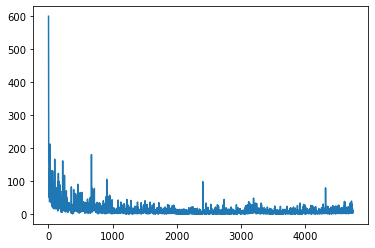

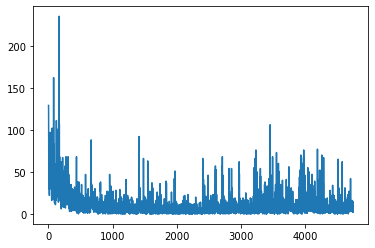

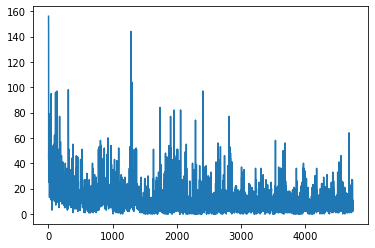

In [414]:
Day0['tradecount'].diff().plot();plt.show()
Day1['tradecount'].diff().plot();plt.show()
Day2['tradecount'].diff().plot();plt.show()

可以较明显看出开盘时交易量较高，可能因为休市的时候有一些信息并没有及时反应在市场上，故开盘交易量较高
其余的成交金额变化我没有看出特别明显的趋势/原因，可能是我对高频交易数据确实没有足够的了解

# Q4

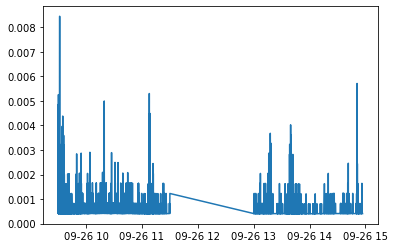

In [415]:
import matplotlib.pyplot as plt
Day0['mp'] = 0.5*(Day0['ap1'] + Day0['bp1'])
Day0['spdr'] = (Day0['ap1'] - Day0['bp1'])/Day0['mp']
plt.plot(Day0['timestamp'].apply(get_time),Day0['spdr'])
mask = (Day0['spdr'] > 0.003).shift(-1).fillna(False)

我们定义流动性为买k卖k弱势方挂单量总和，观察sqdr为较大值（0.003以上）前一时间点的流动性，发现流动性较平均小，这也符合我们对于流动性和价差关系的基本认定

In [427]:
for r in range(1,11):
    print("定义流动性为买卖{}价弱势方挂单总和：".format(r))
    ask = []
    bid = []
    for i in range(r):
        ask.append(29+2*i)
        bid.append(30+2*i)
    av_sum = Day0.iloc[:,ask].sum(axis = 1)
    bv_sum = Day0.iloc[:,bid].sum(axis = 1)
    liquidity = -(abs(av_sum - bv_sum) - (av_sum + bv_sum))/2
    #abs(a,b) - (a+b) = -2min(a,b)
    ask = Day0.iloc[:,29:29+2*r].sum(axis = 1)
    print("全日流动性平均值：{:.2f}".format(liquidity.mean()) + "价差变大前一刻流动性平均值：{:.2f}".format(liquidity[mask].mean()))
    

定义流动性为买卖1价弱势方挂单总和：
全日流动性平均值：4939.56价差变大前一刻流动性平均值：3037.84
定义流动性为买卖2价弱势方挂单总和：
全日流动性平均值：14215.74价差变大前一刻流动性平均值：7949.51
定义流动性为买卖3价弱势方挂单总和：
全日流动性平均值：24600.13价差变大前一刻流动性平均值：15397.89
定义流动性为买卖4价弱势方挂单总和：
全日流动性平均值：34691.08价差变大前一刻流动性平均值：25567.32
定义流动性为买卖5价弱势方挂单总和：
全日流动性平均值：45115.59价差变大前一刻流动性平均值：33289.49
定义流动性为买卖6价弱势方挂单总和：
全日流动性平均值：56414.39价差变大前一刻流动性平均值：40863.78
定义流动性为买卖7价弱势方挂单总和：
全日流动性平均值：68554.45价差变大前一刻流动性平均值：48960.00
定义流动性为买卖8价弱势方挂单总和：
全日流动性平均值：81102.89价差变大前一刻流动性平均值：56680.57
定义流动性为买卖9价弱势方挂单总和：
全日流动性平均值：92684.76价差变大前一刻流动性平均值：67896.78
定义流动性为买卖10价弱势方挂单总和：
全日流动性平均值：104009.14价差变大前一刻流动性平均值：76812.70


In [428]:
# 考虑所有天的情况
data = pd.concat([Day0,Day1,Day2])
for r in range(1,11):
    print("定义流动性为买卖{}价弱势方挂单总和：".format(r))
    ask = []
    bid = []
    for i in range(r):
        ask.append(29+2*i)
        bid.append(30+2*i)
    av_sum = data.iloc[:,ask].sum(axis = 1)
    bv_sum = data.iloc[:,bid].sum(axis = 1)
    liquidity = -(abs(av_sum - bv_sum) - (av_sum + bv_sum))/2
    #abs(a,b) - (a+b) = -2min(a,b)
    ask = data.iloc[:,29:29+2*r].sum(axis = 1)
    print("三日流动性平均值：{:.2f}".format(liquidity.mean()) + "价差变大前一刻流动性平均值：{:.2f}".format(liquidity[mask].mean()))

定义流动性为买卖1价弱势方挂单总和：
三日流动性平均值：3949.45价差变大前一刻流动性平均值：2472.57
定义流动性为买卖2价弱势方挂单总和：
三日流动性平均值：11392.70价差变大前一刻流动性平均值：7556.98
定义流动性为买卖3价弱势方挂单总和：
三日流动性平均值：20076.72价差变大前一刻流动性平均值：13411.04
定义流动性为买卖4价弱势方挂单总和：
三日流动性平均值：29077.61价差变大前一刻流动性平均值：21823.44
定义流动性为买卖5价弱势方挂单总和：
三日流动性平均值：38512.26价差变大前一刻流动性平均值：32027.58
定义流动性为买卖6价弱势方挂单总和：
三日流动性平均值：48868.52价差变大前一刻流动性平均值：42320.95
定义流动性为买卖7价弱势方挂单总和：
三日流动性平均值：59815.62价差变大前一刻流动性平均值：54369.02
定义流动性为买卖8价弱势方挂单总和：
三日流动性平均值：71255.32价差变大前一刻流动性平均值：64608.91
定义流动性为买卖9价弱势方挂单总和：
三日流动性平均值：82629.19价差变大前一刻流动性平均值：73261.88
定义流动性为买卖10价弱势方挂单总和：
三日流动性平均值：93718.40价差变大前一刻流动性平均值：82977.17


# Q5

取过去20个时间点last price的log return的标准差

优点：能够判断快速上涨和震荡上涨的区别。如果总上涨量一定（即过去20点log return的和一定），有正有负和全为正 log return的标准差显然会相差很大
缺点：会将[0,10,0,10,0,10]和[-5,5,-5,5,-5,5]判断成一样的波动率。理论上来说，前者的波动率应当更小，因为可能前者在return为0的时间点没有产生交易或者产生的交易量非常小，那么“产生交易的数据”的标准差显然后者更大
所以优化这个方案就是将标准差中的平均权重换成以交易量为权重，即

$\sum_{t=0}^{20} \frac{trades_t}{sum(trades)} * (r_t - \bar{r})^2$

同样的，收益的平均值也以交易量为权重计算，即
$\bar{r} = \sum_{t=0}^{20} \frac{trades_t}{sum(trades)} * r_t$

在这种情况下，若[0,10,0,10,0,10]中三个无价格变化的点未产生交易，则波动率会被计算成0

也许三秒间隔的数据看不出什么区别，但是遇到更高频的数据会有更多交易量为0的观察值，这样的计算方法会展现出优势

# Q6
我认为选买一卖一的挂单量差不能体现市场的深度，应该选用买k卖k挂单量之和的差。但是k是一个需要选择/训练的参数，我认为具体k的选择应当取决于策略本身想要target的频率范围。比如如果要预测未来一分钟的收益，那么应当观测未来一分钟收益的绝对值的分布，再去看买k/卖k报价的差，选择合适的值。比如说从买3到卖3的价差平均来说可能是0.065左右，0.065这个值在1分钟价格变化的绝对值分布中在一个较合理的位置，那么可以选k先简单检验一下与未来价格走势的关系，再进一步考虑是否要优化k的选值。


0.06332208394853703


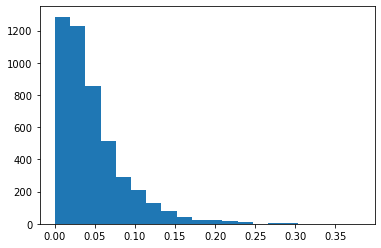

In [418]:
def get_imbalance(data, k):
    ask = []
    bid = []
    for i in range(k):
        ask.append(29+2*i)
        bid.append(30+2*i)
    av_sum = data.iloc[:,ask].sum(axis = 1)
    bv_sum = data.iloc[:,bid].sum(axis = 1)
    return pd.Series((bv_sum-av_sum)/(bv_sum+av_sum), name = 'imbalance')

def get_spread(data, k):
    return data.iloc[:,7+2*k] - data.iloc[:,8+2*k]

print(get_spread(Day0,3).mean())

plt.hist(abs(Day0['last'].diff(20)),bins = 20);plt.show()

显然imbalance和return都是可能会有自相关性，所以我们要在回归中使用newey west修正对参数方差和t-stat的估计，那么首先要决定引入的lag长度

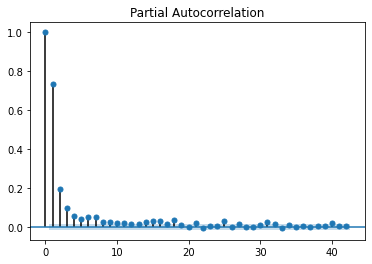

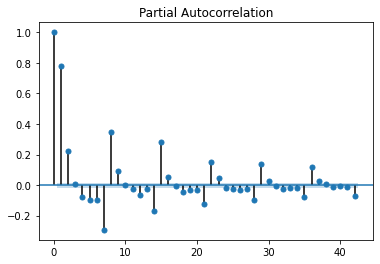

In [433]:
imb = get_imbalance(data,3)
one_minute_return = data['last'].diff(7).shift(-7)
sm.graphics.tsa.plot_pacf(imb);plt.show()
sm.graphics.tsa.plot_pacf(one_minute_return[:-7]);plt.show()

In [420]:
# maxlags = 10 我对所有参数值（订单簿深度，预测收益窗口长度）所有天都画了PACF，都是前10个lag比较显著
# 为了避免篇幅过长就不在这里全部展示了
imb = get_imbalance(data,3)
one_minute_return = data['last'].diff(20).shift(-20)
sm.OLS(one_minute_return,sm.add_constant(imb),missing = 'drop').fit(cov_type = 'HAC', cov_kwds = {'maxlags':10}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   last   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     10.08
Date:                Sun, 26 Sep 2021   Prob (F-statistic):            0.00150
Time:                        16:56:37   Log-Likelihood:                 16523.
No. Observations:               14203   AIC:                        -3.304e+04
Df Residuals:                   14201   BIC:                        -3.303e+04
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.002      1.633      0.102      -0.001       0.007
imbalance      0.0075      0.002      3.175      0.001       0.003       0.012
==============================================================================
Omnibus:                     6853.297   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155154.266
Skew:                           1.809   Prob(JB):                         0.00
Kurtosis:                      18.783   Cond. No.                         1.91
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 10 lags and without small sample correction
"""

imbalance和价格变化正相关且显著，这是符合基本经济学逻辑的，即买方力量大，需求高，属于卖方市场价格会上扬。

其实这个模型中有两个参数，一个是我们采用的订单薄深度，一个是预测未来未来收益的窗口长度。

我们可以把两个参数用grid search的方式并画一个heatmap看看

k取值{1,2,3,...10}，窗口长度从15秒到180秒间隔15秒（5个tick到60个tick）

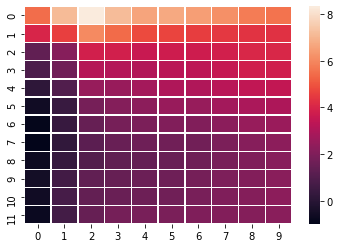

In [421]:
grid = np.zeros((12,10))
for k in range(1,11):
    for l in range(1,13):
        imb = get_imbalance(data,k)
        returns = data['last'].diff(5*l).shift(-5*l)
        grid[l-1,k-1] = sm.OLS(returns,sm.add_constant(imb),missing = 'drop').fit(cov_type = 'HAC', cov_kwds = {'maxlags':10}).tvalues['imbalance']

ax = sns.heatmap(grid, linewidth=0.5)
plt.show()

可以看出来大多数的预测是有效的。短期的预测(15-45秒，前三行)用买卖2-5的order book更好，稍长期的预测用买10卖10更好
再长期的预测，尤其是2分钟以上的，也是买10卖10最好，但是显著性已经下降不少了。

# Q7 & Q8

我认为这个定义有一些有歧义的地方，其主要问题在于两个相邻tick之间，无法排除在bid ask之间成交的情况，尤其当spread比较大且获取的数据频率不够高(3秒)的情况下。所以我认为act_buy和act_sell的具体量在已有的条件环境、假设环境、数据环境下是极难计算的，但trade_fc还是可以设计成类型变量(categorical variable),通过判断最新成交价和上一个tick ap1 和 bp1 之间的关系。

如果last price和上一个tick哪一方的一档价格更接近，则为另一方发起（既有可能是last price在某一方的报价内，也有可能是在中间但更靠近某一方）
如果同样接近即在ap1 bp1中点则无法判断 

In [431]:
data['ap1_prev'] = data['ap1'].shift(1)
data['bp1_prev'] = data['bp1'].shift(1)
def get_trade_fc(row):
    mid = (row['ap1_prev'] + row['bp1_prev'])
    diff = row['last'] - mid
    if diff < 0:
        # closer to prev bid pric, ask initiate
        return -1
    elif diff > 0:
        # closer to prev ask, bid initiate
        return 1
    else:
        return 0

data['trade_fc'] = data.apply(get_trade_fc,axis = 1)
data.loc[0,'trade_fc'] = np.nan #this applies to the first tick of all three days due to sane index
one_minute_return = data['last'].diff(20).shift(-20)
sm.OLS(one_minute_return,sm.add_constant(imb),missing = 'drop').fit(cov_type = 'HAC', cov_kwds = {'maxlags':10}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   last   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     14.50
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           0.000140
Time:                        17:05:51   Log-Likelihood:                 16558.
No. Observations:               14203   AIC:                        -3.311e+04
Df Residuals:                   14201   BIC:                        -3.310e+04
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.002      2.068      0.039       0.000       0.008
imbalance      0.0158      0.004      3.808      0.000       0.008       0.024
==============================================================================
Omnibus:                     6853.705   Durbin-Watson:                   0.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           158340.705
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      18.955   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 10 lags and without small sample correction
"""

那么trade_fc同样也是和未来一分钟收益显著正相关，同样也符合我们对于市场供需的基本经济学认知。
也可以像第六问一样用grid search的方式，但操作其实是一样的，就无需重复了

# Q9
根据第七问我的解释，无法在不做大量假设的情况下以现有数据判断主动买卖量，所以撤单量就无法根据主动买卖量去计算。可能是我对于高频数据和策略的了解还不够，希望能在后续的面试中讨论合理的做法！

# Q10
我们可以根据Q6 Q8的结论，判断买方和卖方的“力量”和“主动性”，哪一方比较有力、比较主动，价格将向另外一方的方向移动，并在一定的时间后平仓。这样策略能盈利是基于经济学的基本供需理论，我们发现市场的不平衡之后，市场总是会朝着平衡的方向移动进入下一个稳态。不盈利的原因也有很多，比如交易手续费太高，或者我们挂单的行为本身就会改变市场结构。当然，也有一种非常简单的解释，比如当发现买方势力大于卖方势力的时候，我们后入场，受限于通讯、先后排序、市场流动性，我们并不一定能按照last入场，很有可能只能向上选取卖方的价格，那么预期收益就会小很多，也会有机构做对手盘来反打我们的策略。